# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [64]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [65]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [66]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
urban_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [67]:
# 2. Get the total drivers for each city type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [68]:
#  3. Get the total amount of fares for each city type
type_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [69]:
#  4. Get the average fare per ride for each city type. 
type_avg_rfare = type_fare_count / type_ride_count
type_avg_rfare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [70]:
# 5. Get the average fare per driver for each city type. 
type_avg_dfare = type_fare_count / type_driver_count
type_avg_dfare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [71]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame ({
            "Total Rides": type_ride_count,
            "Total Drivers": type_driver_count,
            "Total Fares": type_fare_count,
            "Average Fare per Ride": type_avg_rfare,
            "Average Fare per Driver": type_avg_dfare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [72]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [73]:
#  8. Format the columns.

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [74]:
# 1. Read the merged DataFrame
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


In [75]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
new_pyber_data_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
new_pyber_data_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [76]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
new_pyber_data_df = new_pyber_data_df.reset_index()
new_pyber_data_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [79]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
new_pyber_data_df_pivot = new_pyber_data_df.pivot(index="date", columns="type", values="fare")
new_pyber_data_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [81]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
##new2019_pyber_data_df_pivot = new_pyber_data_df_pivot.loc[(new_pyber_data_df_pivot["date"] >= "2019-01-01") & (new_pyber_data_df_pivot["date"]<= "2019-04-29")]
new2019_pyber_data_df_pivot = new_pyber_data_df_pivot.loc["2019-01-01":"2019-04-01"]

new2019_pyber_data_df_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-03-31 11:49:06,NaN,NaN,24.16
2019-03-31 13:58:15,NaN,NaN,29.41
2019-03-31 14:58:15,NaN,NaN,7.67


In [84]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

new2019_pyber_data_df_pivot.index = pd.to_datetime(new2019_pyber_data_df_pivot.index)
new2019_pyber_data_df_pivot.index

DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-03-30 20:43:11', '2019-03-30 21:22:58',
               '2019-03-31 02:08:34', '2019-03-31 03:35:12',
               '2019-03-31 06:05:30', '2019-03-31 11:49:06',
               '2019-03-31 13:58:15', '2019-03-31 14:58:15',
               '2019-03-31 15:22:26', '2019-03-31 17:01:37'],
              dtype='datetime64[ns]', name='date', length=1652, freq=None)

In [86]:
# 7. Check that the datatype for the index is datetime using df.info()
new2019_pyber_data_df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1652 entries, 2019-01-01 00:08:16 to 2019-03-31 17:01:37
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     79 non-null     float64
 1   Suburban  433 non-null    float64
 2   Urban     1140 non-null   float64
dtypes: float64(3)
memory usage: 51.6 KB


In [133]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
new2019_df = new2019_pyber_data_df_pivot.resample('W').sum()

new2019_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [137]:
new2019_df["Urban"].groupby(["date"])


In [120]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import numpy as np
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [144]:
# fares by city type by day
new2019_df = new2019_df.reset_index()

new2019_df



type,date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


In [146]:
#urban_weekly_fare = new2019_df.groupby(["Urban"])
#plt.scatter(urban_weekly_fare)

#new2019_df = new2019_df.pivot(index="date", columns="Urban", values="fare")
#new2019_df

# x_info = new2019_df["date"].values.tolist()
x_info = list(new2019_df["date"])
x_info

[Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-02-03 00:00:00'),
 Timestamp('2019-02-10 00:00:00'),
 Timestamp('2019-02-17 00:00:00'),
 Timestamp('2019-02-24 00:00:00'),
 Timestamp('2019-03-03 00:00:00'),
 Timestamp('2019-03-10 00:00:00'),
 Timestamp('2019-03-17 00:00:00'),
 Timestamp('2019-03-24 00:00:00'),
 Timestamp('2019-03-31 00:00:00')]

In [147]:
uy_info = list(new2019_df["Urban"])
sy_info = new2019_df["Suburban"]
ry_info = new2019_df["Rural"]
print(uy_info)

[1661.68, 2050.43, 1939.02, 2129.5099999999998, 2086.94, 2162.64, 2235.07, 2466.29, 2218.2, 2470.93, 2044.42, 2368.37, 1942.77]


In [138]:
urban_summary_df = pd.DataFrame ({"date": x_info,"U Fares": uy_info})
suburban_summary_df = pd.DataFrame ({"date": x_info,"S Fares": sy_info})
rural_summary_df = pd.DataFrame ({"date": x_info,"R Fares": ry_info})
urban_summary_df

,date,U Fares
0,2019-01-06,1661.68
1,2019-01-13,2050.43
2,2019-01-20,1939.02
3,2019-01-27,2129.51
4,2019-02-03,2086.94
5,2019-02-10,2162.64
6,2019-02-17,2235.07
7,2019-02-24,2466.29
8,2019-03-03,2218.20
9,2019-03-10,2470.93


<AxesSubplot:xlabel='date'>

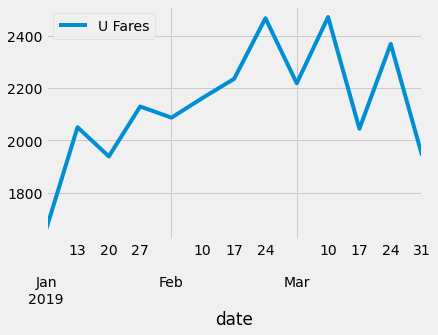

In [149]:
#x_axis = np.arange(len(urban_summary_df))
#print(x_axis)

#tick_locations = [value for value in x_axis]

urban_summary_df.plot("date", "U Fares")
#suburban_summary_df.plot("date", "S Fares")
#rural_summary_df.plot("date", "R Fares")